# Customer Segmentation Project - Part 1 [Data Cleansing]

**A Classification & Clustering Model**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df_raw = pd.read_csv('dataset/ori_dataset.csv')
df = df_raw.copy()
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Early Preparation

### Brief Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Dari data di atas, dapat dilihat bahwa:
* Dataframe memiliki total 8068 baris dan 11 kolom
* Dataframe masih memiliki *null* values di kolom `Ever_Married`, `Graduated`, `Profession`, `Work_Experience`, `Family_Size`, `Var_1`

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

#### Numeric Checking

In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Tidak ditemukan ada nilai yang kurang wajar (min - max) 

#### Categorical Checking

In [6]:
num_df = df.select_dtypes(include = ['int64','float64'])

cat_df = df.select_dtypes(include = ['object'])
cat_df.head(2)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A


In [7]:
# Value Checking
for col in cat_df.columns:
  print('Values pada kolom {}:'.format(col))
  print(cat_df[col].unique())
  print()

Values pada kolom Gender:
['Male' 'Female']

Values pada kolom Ever_Married:
['No' 'Yes' nan]

Values pada kolom Graduated:
['No' 'Yes' nan]

Values pada kolom Profession:
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Values pada kolom Spending_Score:
['Low' 'Average' 'High']

Values pada kolom Var_1:
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']

Values pada kolom Segmentation:
['D' 'A' 'B' 'C']



Selain nan, tidak ada nilai yang kurang wajar

### Data Cleaning

#### Duplicate Checking

In [8]:
df.duplicated().sum()

0

#### Drop Unused Feature

In [9]:
df = df.drop('ID', axis=1)

#### NaN Imputation

Check the missing value percentage

In [10]:
tab = df.columns
table = pd.DataFrame(tab)

nullrate = []
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    nullrate.append(null_rate)

table['Null Rate'] = nullrate

table.columns = ['Column', 'Null Rate']
table

,Column,Null Rate
0,Gender,0.000000
1,Ever_Married,1.735250
2,Age,0.000000
3,Graduated,0.966782
4,Profession,1.536936
5,Work_Experience,10.275161
6,Spending_Score,0.000000
7,Family_Size,4.152206
8,Var_1,0.941993
9,Segmentation,0.000000


#### Categorical Impute

##### Ever_Married

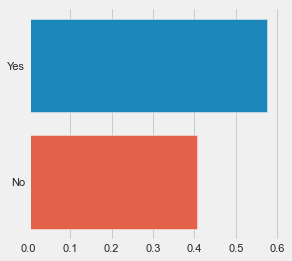

In [11]:
Ever_Married = df['Ever_Married'].value_counts() / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharey=True)
ax = sns.barplot(x=Ever_Married.values, y=Ever_Married.index)

Dengan perbedaan sekitar 20%, melakukan imputasi 1.74% nan kepada nilai modus (Yes) tidak akan menyebabkan distorsi yang signifikan pada keseluruhan dataset

In [12]:
df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)

##### Graduated

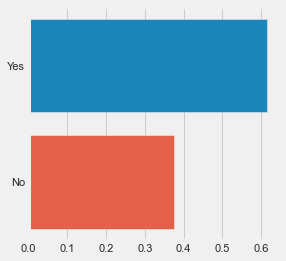

In [13]:
Graduated = df['Graduated'].value_counts() / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharey=True)
ax = sns.barplot(x=Graduated.values, y=Graduated.index)

Dengan perbedaan sekitar 25%, melakukan imputasi 0.94% nan kepada nilai modus (Yes) tidak akan menyebabkan distorsi yang signifikan pada keseluruhan dataset

In [14]:
df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)

##### Profession

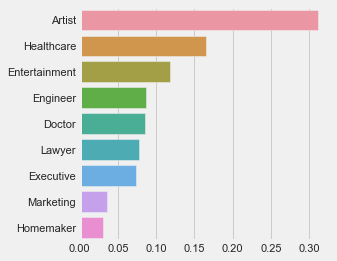

In [15]:
Profession = df['Profession'].value_counts() / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharey=True)
ax = sns.barplot(x=Profession.values, y=Profession.index)

Artist menjadi top value tunggal, dapat dilakukan imputasi 1.54% nan kepada nilai modus (Artist)

In [16]:
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

##### Var_1

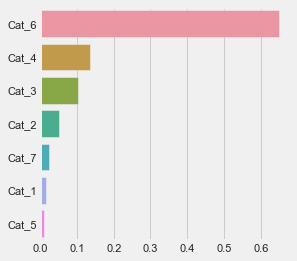

In [17]:
Var_1 = df['Var_1'].value_counts() / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharey=True)
ax = sns.barplot(x=Var_1.values, y=Var_1.index)

Cat_6 menjadi top value tunggal, dapat dilakukan imputasi 0.94% nan kepada nilai modus (Cat_6)

In [18]:
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

#### Numerical

##### Work_Experience

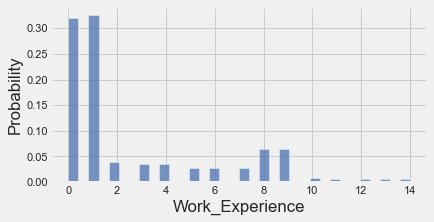

In [19]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['Work_Experience'], stat='probability')
plt.show()

In [20]:
print("The Skewness is %.2f" %df['Work_Experience'].skew() )
print("The Mean is %.2f" %df['Work_Experience'].mean() )
print("The Median is %.2f" %df['Work_Experience'].median() )
print("The Mode is %.2f" %df['Work_Experience'].mode() )

The Skewness is 1.31
The Mean is 2.64
The Median is 1.00
The Mode is 1.00


Dapat dilihat bahwa distribusi di atas, sebagian besar data berkumpul pada 0 dan 1 year work experience. Namun dengan NaN sebesar 10.28%, perlakuan imputasi hanya pada 1 angka (median) dapat menyebabkan distorsi distribusi yang signifikan.

Contohnya, bila kita letakkan semua missing value pada work exp = 1, tiba - tiba persentase WE1 akan lebih dari 40% dan mendistorsi perbandingannya terhadap WE0


Karena itu, dapat dilakukan imputasi dengan ratio-based

In [21]:
work_0 = df[df['Work_Experience'] == 0]
work_1 = df[df['Work_Experience'] == 1]

ratio_0y = round(work_0.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)
ratio_1y = round(work_1.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)

print("Work 0 year ratio: ", ratio_0y)
print("Work 1 year ratio: ", ratio_1y)

Work 0 year ratio:  0.496
Work 1 year ratio:  0.504


Dengan menggunakan ratio tersebut, akan di apply secara random pada setiap data NaN

In [22]:
option = [0, 1]

df['Work_Experience'] = df['Work_Experience'].apply(lambda x: np.random.choice(option, p=[ratio_0y, ratio_1y]) \
                                                    if pd.isnull(x) else x)

##### Family_Size

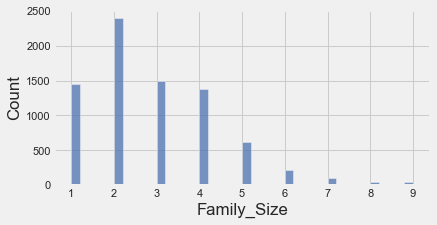

In [23]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['Family_Size'])
plt.show()

In [24]:
print("The Skewness is %.2f" %df['Family_Size'].skew() )
print("The Mean is %.2f" %df['Family_Size'].mean() )
print("The Median is %.2f" %df['Family_Size'].median() )
print("The Mode is %.2f" %df['Family_Size'].mode() )

The Skewness is 1.01
The Mean is 2.85
The Median is 3.00
The Mode is 2.00


Pada distribusi yang skewed, akan lebih baik menggunakan nilai median dibandingkan mean

In [25]:
df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)

#### Final Checking

In [26]:
tab = df.columns
table = pd.DataFrame(tab)

nullrate = []
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    nullrate.append(null_rate)

table['Null Rate'] = nullrate

table.columns = ['Column', 'Null Rate']
table

,Column,Null Rate
0,Gender,0.0
1,Ever_Married,0.0
2,Age,0.0
3,Graduated,0.0
4,Profession,0.0
5,Work_Experience,0.0
6,Spending_Score,0.0
7,Family_Size,0.0
8,Var_1,0.0
9,Segmentation,0.0


Semua missing value sudah dimodifikasi

**---------**

In [27]:
df.to_csv('output_p1.csv', index=False)

In [31]:
import os

os.system('jupyter nbconvert --to html Part_1_Data_Cleansing.ipynb')

0